In [ ]:
!pip install -Uqq fastai transformers nbdev

     |████████████████████████████████| 187 kB 5.2 MB/s 
     |████████████████████████████████| 3.8 MB 45.5 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 596 kB 46.3 MB/s 
     |████████████████████████████████| 67 kB 5.1 MB/s 
     |████████████████████████████████| 6.5 MB 36.7 MB/s 
     |████████████████████████████████| 895 kB 45.1 MB/s 
     |████████████████████████████████| 51 kB 344 kB/s 
     |████████████████████████████████| 561 kB 34.0 MB/s 
     |████████████████████████████████| 130 kB 35.7 MB/s 


In [ ]:
import nbdev
import fastai
from fastai import *
from nbdev.showdoc import *
import pandas as pd
fastai.__version__

'2.5.5'

Add the `csv` file created from the `notion.py`.

In [ ]:
df = pd.read_csv('data.csv', infer_datetime_format=True, parse_dates = ['ts'])

In [ ]:
df

,id,ts,date,text
0,7edba87f-c83d-4064-a7a8-308ea0c788bf,2021-05-07 02:38:00+00:00,2021-05-07,The days have been really tiring since the las...
1,baa20972-8e4b-4d4b-b0bc-9ee029c49a73,2021-05-07 20:16:00+00:00,2021-05-07,I started feeling a bit overwhelmed once Denni...
2,25fea619-8292-4228-b878-2f383b0a938b,2021-05-11 15:54:00+00:00,2021-05-11,There is a lot of work that I need to do today...
3,1bded946-e5f6-4529-859b-a71a5aab807d,2021-05-13 03:39:00+00:00,2021-05-13,This day has been a bit different. I will uplo...
4,35580de6-106a-4512-9684-9d7285df5dd9,2021-05-13 13:10:00+00:00,2021-05-13,I have luckily started my day a bit early. I w...
...,...,...,...,...
252,cc5e3d79-ac8e-427c-ad8a-94c1b435776f,2022-03-20 03:14:00+00:00,2022-03-20,What is the reason behind drowning myself in w...
253,707dfa55-2c88-41cc-a3b9-1253c2e335fa,2022-03-21 02:33:00+00:00,2022-03-21,Quite a different day today. I ate a lot. I ha...
254,d21af4b0-eef7-4bcb-9a9e-905ce0d88cc6,2022-03-22 18:23:00+00:00,2022-03-22,I don’t know I feel a little agitated after ta...
255,9df7adf7-c275-4d3d-9d02-4433b94f13fb,2022-03-24 01:34:00+00:00,2022-03-24,It is Tejas’ birthday today. I wished him and ...


In [ ]:
from fastai.text.all import *

In [ ]:
dls = TextDataLoaders.from_df(df=df, text_col='text', is_lm=True)

In [ ]:
dls.show_batch()

In [ ]:
show_doc(language_model_learner)

In [ ]:
learn = language_model_learner(dls, AWD_LSTM, metrics = [accuracy, perplexity])

In [ ]:
!nvidia-smi

Sat Mar 26 04:23:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    78W / 149W |   1772MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

SuggestedLRs(valley=0.004365158267319202)

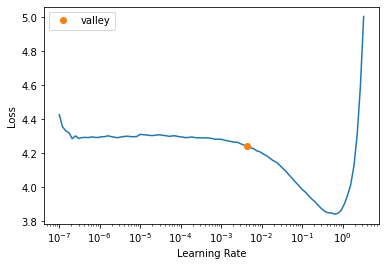

In [ ]:
learn.lr_find()

In [ ]:
show_doc(text_classifier_learner)

In [ ]:
learn.fine_tune(30, 4e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.292253,3.922483,0.252474,50.525742,00:02


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.121733,3.831645,0.264909,46.138397,00:02
1,4.069792,3.757095,0.268533,42.823837,00:02
2,4.021965,3.685192,0.274457,39.852768,00:02
3,3.972597,3.611061,0.275282,37.005299,00:02
4,3.926610,3.543352,0.285091,34.582649,00:02
5,3.869319,3.471813,0.287804,32.195057,00:02
6,3.814053,3.413671,0.291146,30.376545,00:02
7,3.756912,3.370538,0.293294,29.094183,00:02
8,3.702992,3.319654,0.299566,27.650768,00:02
9,3.648766,3.289167,0.303798,26.820511,00:02


In [ ]:
learn.predict('Today,', n_words = 3000)